In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

import time
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

648

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14f9f957d35fd96630532f072cebe0bc


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ambon
Processing Record 2 of Set 1 | chiredzi
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | hastings
Processing Record 5 of Set 1 | kawalu
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | port hueneme
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | marcona
City not found. Skipping...
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | omsukchan
Processing Record 17 of Set 1 | ketchikan
Processing Record 18 of Set 1 | odesskoye
Processing Record 19 of Set 1 | los tangos
Processing Record 20 of Set 1 | hirara
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 22 of Se

Processing Record 36 of Set 4 | fougamou
Processing Record 37 of Set 4 | rorvik
Processing Record 38 of Set 4 | cumbum
Processing Record 39 of Set 4 | maridi
City not found. Skipping...
Processing Record 40 of Set 4 | dwarka
Processing Record 41 of Set 4 | ust-tsilma
Processing Record 42 of Set 4 | lincoln
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | sola
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | bentiu
City not found. Skipping...
Processing Record 47 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 48 of Set 4 | coquimbo
Processing Record 49 of Set 4 | meulaboh
Processing Record 50 of Set 4 | gari
Processing Record 1 of Set 5 | praia
Processing Record 2 of Set 5 | praia da vitoria
Processing Record 3 of Set 5 | sidi ali
Processing Record 4 of Set 5 | camapua
Processing Record 5 of Set 5 | livramento
Processing Record 6 of Set 5 | ranot
Processing Record 7 of Set 5 | vojens
Processing Record 8 of Set 5 | high ro

Processing Record 25 of Set 8 | seoul
Processing Record 26 of Set 8 | lorengau
Processing Record 27 of Set 8 | bambanglipuro
Processing Record 28 of Set 8 | rungata
City not found. Skipping...
Processing Record 29 of Set 8 | saint george
Processing Record 30 of Set 8 | benguela
Processing Record 31 of Set 8 | rognan
Processing Record 32 of Set 8 | marica
Processing Record 33 of Set 8 | berdigestyakh
Processing Record 34 of Set 8 | kruisfontein
Processing Record 35 of Set 8 | havelock
Processing Record 36 of Set 8 | ucluelet
Processing Record 37 of Set 8 | santa flavia
Processing Record 38 of Set 8 | akropong
Processing Record 39 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 40 of Set 8 | ponta do sol
Processing Record 41 of Set 8 | byron bay
Processing Record 42 of Set 8 | warqla
City not found. Skipping...
Processing Record 43 of Set 8 | chicama
Processing Record 44 of Set 8 | haines junction
Processing Record 45 of Set 8 | dong xoai
Processing Record 46 of Se

Processing Record 6 of Set 12 | duldurga
Processing Record 7 of Set 12 | kilindoni
Processing Record 8 of Set 12 | quatre cocos
Processing Record 9 of Set 12 | gwadar
Processing Record 10 of Set 12 | puerto escondido
Processing Record 11 of Set 12 | trelew
Processing Record 12 of Set 12 | sioux lookout
Processing Record 13 of Set 12 | chany
Processing Record 14 of Set 12 | hailin
Processing Record 15 of Set 12 | souillac
Processing Record 16 of Set 12 | stromness
Processing Record 17 of Set 12 | oskarshamn
Processing Record 18 of Set 12 | tsagan aman
Processing Record 19 of Set 12 | sao felix do xingu
Processing Record 20 of Set 12 | maple valley
Processing Record 21 of Set 12 | maceio
Processing Record 22 of Set 12 | los llanos de aridane
Processing Record 23 of Set 12 | tiarei
Processing Record 24 of Set 12 | nago
Processing Record 25 of Set 12 | calvia
Processing Record 26 of Set 12 | vila
Processing Record 27 of Set 12 | medak
Processing Record 28 of Set 12 | mateare
Processing Rec

In [7]:
len(city_data)

587

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ambon,47.55,-2.56,46.40,93,4,4.70,FR,2020-01-04 00:15:33
1,Chiredzi,-21.05,31.67,73.45,75,0,5.41,ZW,2020-01-04 00:14:11
2,Hilo,19.71,-155.08,82.40,58,20,8.05,US,2020-01-04 00:15:34
3,Hastings,-39.64,176.84,59.54,71,66,11.30,NZ,2020-01-04 00:15:34
4,Kawalu,-7.38,108.21,73.17,85,100,2.59,ID,2020-01-04 00:15:34
5,Punta Arenas,-53.16,-70.91,51.80,57,40,8.05,CL,2020-01-04 00:15:35
6,Port Hueneme,34.15,-119.20,72.00,45,1,5.82,US,2020-01-04 00:11:05
7,Katsuura,33.93,134.50,48.99,65,75,9.17,JP,2020-01-04 00:14:54
8,Yellowknife,62.45,-114.38,3.20,84,75,8.05,CA,2020-01-04 00:12:20
9,Mataura,-46.19,168.86,52.00,65,99,20.00,NZ,2020-01-04 00:15:35


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head(10) 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ambon,FR,2020-01-04 00:15:33,47.55,-2.56,46.40,93,4,4.70
1,Chiredzi,ZW,2020-01-04 00:14:11,-21.05,31.67,73.45,75,0,5.41
2,Hilo,US,2020-01-04 00:15:34,19.71,-155.08,82.40,58,20,8.05
3,Hastings,NZ,2020-01-04 00:15:34,-39.64,176.84,59.54,71,66,11.30
4,Kawalu,ID,2020-01-04 00:15:34,-7.38,108.21,73.17,85,100,2.59
5,Punta Arenas,CL,2020-01-04 00:15:35,-53.16,-70.91,51.80,57,40,8.05
6,Port Hueneme,US,2020-01-04 00:11:05,34.15,-119.20,72.00,45,1,5.82
7,Katsuura,JP,2020-01-04 00:14:54,33.93,134.50,48.99,65,75,9.17
8,Yellowknife,CA,2020-01-04 00:12:20,62.45,-114.38,3.20,84,75,8.05
9,Mataura,NZ,2020-01-04 00:15:35,-46.19,168.86,52.00,65,99,20.00


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1578097058.0698144

In [14]:
today = time.strftime("%x")
today

'01/03/20'

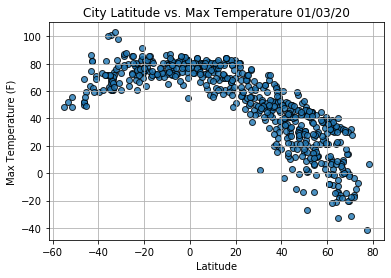

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

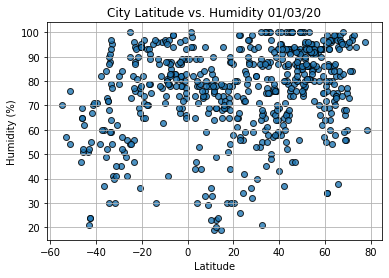

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

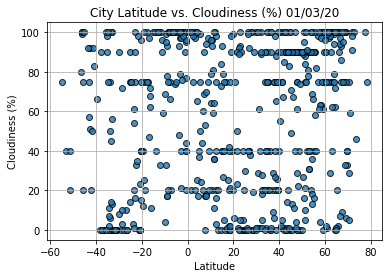

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

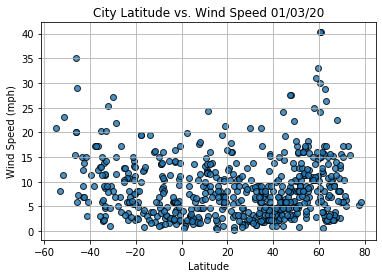

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ambon,FR,2020-01-04 00:15:33,47.55,-2.56,46.40,93,4,4.70
2,Hilo,US,2020-01-04 00:15:34,19.71,-155.08,82.40,58,20,8.05
6,Port Hueneme,US,2020-01-04 00:11:05,34.15,-119.20,72.00,45,1,5.82
7,Katsuura,JP,2020-01-04 00:14:54,33.93,134.50,48.99,65,75,9.17
8,Yellowknife,CA,2020-01-04 00:12:20,62.45,-114.38,3.20,84,75,8.05
...,...,...,...,...,...,...,...,...,...
580,Sawakin,SD,2020-01-04 00:18:11,19.10,37.33,75.60,88,98,21.36
581,Hasan Abdal,IR,2020-01-04 00:18:11,36.62,48.54,28.53,97,100,4.85
582,Argostolion,GR,2020-01-04 00:18:11,38.18,20.49,56.44,58,27,12.28
583,Quepos,CR,2020-01-04 00:15:05,9.43,-84.16,75.20,69,40,4.70


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

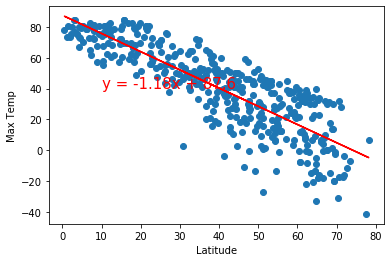

In [23]:
# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

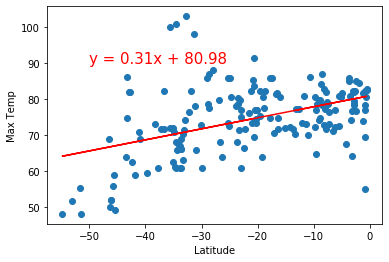

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemispherefor Maximum Temperature', 'Max Temp',(-50,90))

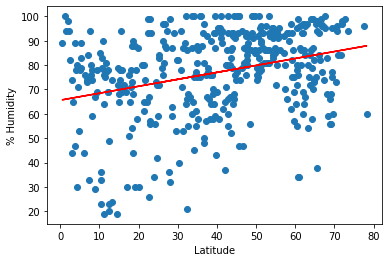

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

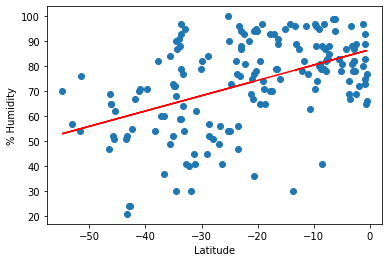

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

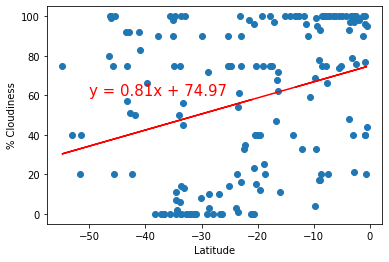

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

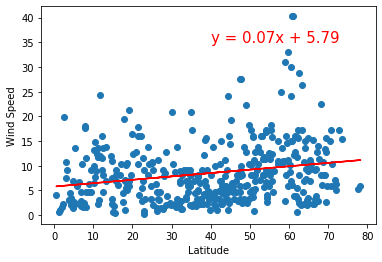

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

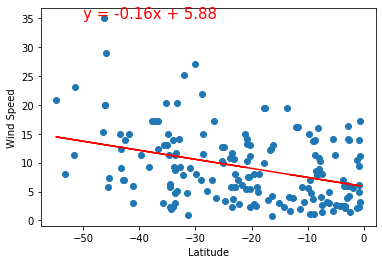

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))